**DSA_LAB_6_Logistic_Regression**

**RISHAV KUMAR**

**2206205**

**Q.6_1)** Use logistic regression to find decision boundary For the 
given database. Set your learning rate to 0.1. What is the cost function value and learning paramet value after convergence?

Final Cost Function Value: 0.22614000056086003
Learned Parameters: [ 0.38193936  2.35449296 -2.53913828]


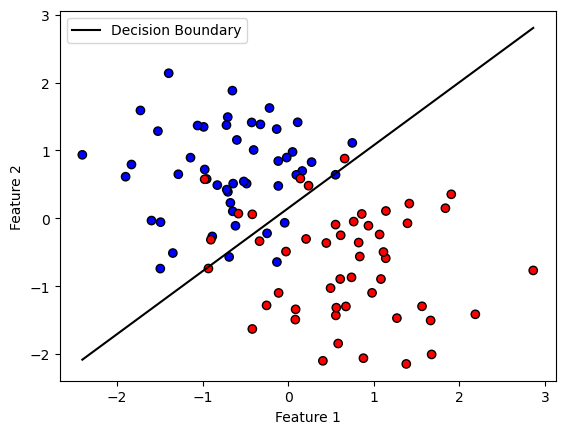

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load datasets
X = pd.read_csv("logisticX.csv").values  # Convert to numpy array
y = pd.read_csv("logisticY.csv").values  # Convert to numpy array

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    
    for _ in range(num_iters):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
m, n = X.shape
X = np.c_[np.ones((m, 1)), X]  # Add intercept term

# Initialize parameters
theta = np.zeros((n + 1, 1))
alpha = 0.1  # Learning rate
num_iters = 1000  # Iterations for gradient descent

# Perform logistic regression
final_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Final cost and parameters
final_cost = compute_cost(X, y, final_theta)
print("Final Cost Function Value:", final_cost)
print("Learned Parameters:", final_theta.ravel())

# Plot decision boundary
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='bwr', edgecolors='k')

# Decision boundary
x_vals = np.array([X[:, 1].min(), X[:, 1].max()])
y_vals = -(final_theta[0] + final_theta[1] * x_vals) / final_theta[2]
plt.plot(x_vals, y_vals, 'k', label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Q6_2)** Plot cost function v/s iteration graph for the model trained in question 1. Do not use scatter plots for this.

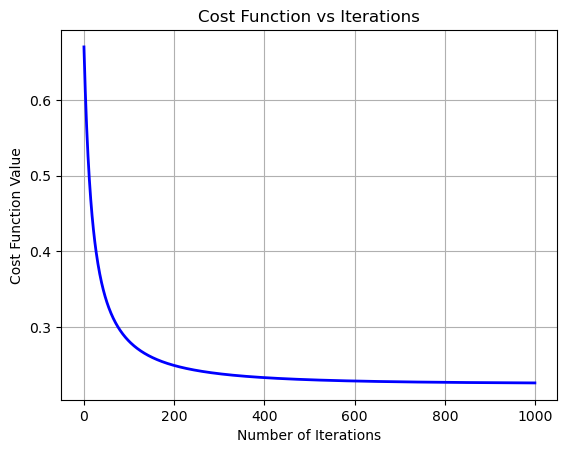

In [8]:
# Plot cost function vs iteration graph
plt.figure()
plt.plot(range(num_iters), cost_history, 'b-', linewidth=2)  # Line plot without scatter
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations")
plt.grid(True)
plt.show()

**Q6_3)** Plot the given dataset on a graph, use different colours for different classes and also show the decision boundary you obtained in question 1. Do not use scatter plot.

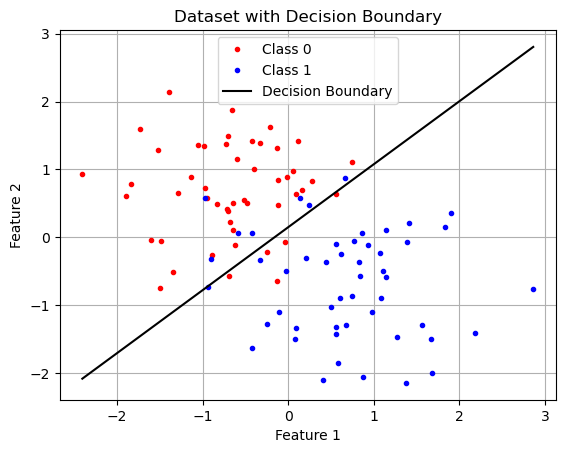

In [12]:
# Plot dataset and decision boundary without scatter plot
plt.figure()
class_0 = X[y.flatten() == 0]
class_1 = X[y.flatten() == 1]
plt.plot(class_0[:, 1], class_0[:, 2], 'r.', label='Class 0')  # Red dots for class 0
plt.plot(class_1[:, 1], class_1[:, 2], 'b.', label='Class 1')  # Blue dots for class 1

# Decision boundary
x_vals = np.array([X[:, 1].min(), X[:, 1].max()])
y_vals = -(final_theta[0] + final_theta[1] * x_vals) / final_theta[2]
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Dataset with Decision Boundary")
plt.grid(True)
plt.show()

**Q6_4)** Train your model with a learning rate of 0.1 and 5. Plot the cost-function v/s iteration curve for both learning rates on the same graph . For this task, only train your model for 100 iterations.

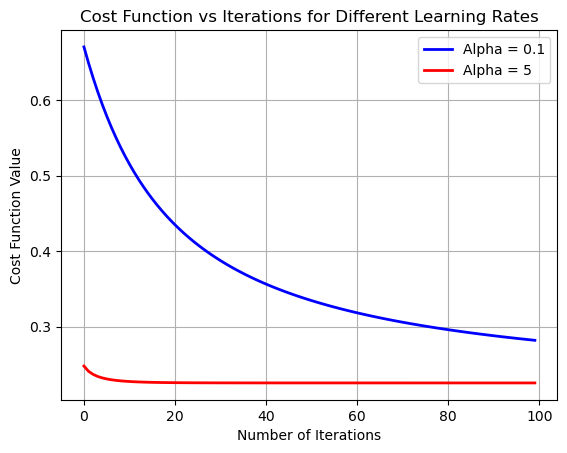

In [15]:
# Train model with different learning rates
num_iters = 100  # Only train for 100 iterations

# Train with alpha = 0.1
theta_1 = np.zeros((n + 1, 1))
theta_1, cost_history_1 = gradient_descent(X, y, theta_1, alpha=0.1, num_iters=num_iters)

# Train with alpha = 5
theta_2 = np.zeros((n + 1, 1))
theta_2, cost_history_2 = gradient_descent(X, y, theta_2, alpha=5, num_iters=num_iters)

# Plot cost function vs iteration for both learning rates
plt.figure()
plt.plot(range(num_iters), cost_history_1, 'b-', label='Alpha = 0.1', linewidth=2)
plt.plot(range(num_iters), cost_history_2, 'r-', label='Alpha = 5', linewidth=2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


**Q6_5_)** Find the confusion matrix for your training dataset. Using the confusion matrix to calculate the accuracy, precision, recall F1-score.

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predict class labels using final learned parameters
y_pred = sigmoid(X @ final_theta) >= 0.5  # Convert probabilities to binary (0 or 1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
 [[44  5]
 [ 7 43]]
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1-Score: 0.8776
